In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# предварительные замеры

In [2]:
df1 = pd.read_csv('/Users/mihail/Desktop/kinetics/OUR_CSV/66771982.csv', skiprows=1)
list(df1)

['WL/nm', 'Abs']

In [3]:
y_max_index = df1['Abs'].idxmax()
y_max = df1['Abs'].max()
x_max = df1.loc[y_max_index, 'WL/nm']
x_max

590.0

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/var/folders/g8/r1nv5gwn47gfw_mc_myvtqcm0000gn/T/ipykernel_6301/4129980343.py:7: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$длинна \ волны, нм$')


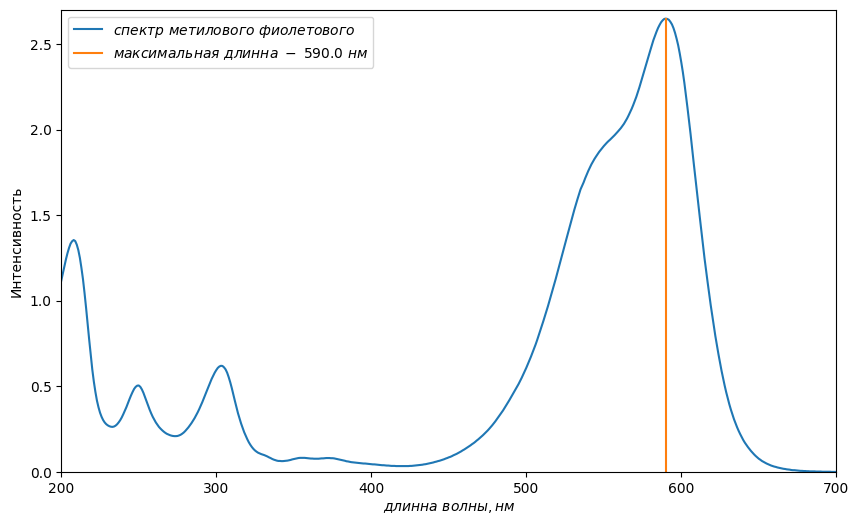

In [4]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(df1['WL/nm'], df1['Abs'], label=r'$спектр\ метилового\ фиолетового$')
plt.plot([x_max, x_max], [0, y_max], label=rf'$максимальная\ длинна\ -\ {x_max}\ нм$')

plt.ylim([0, 2.7])
plt.xlim([200, 700])
plt.xlabel('$длинна \ волны, нм$')
plt.ylabel('Интенсивность')
plt.legend()
plt.savefig('kin_wave.jpg')

# Присматриваемся к графикам и смотрим предварительно

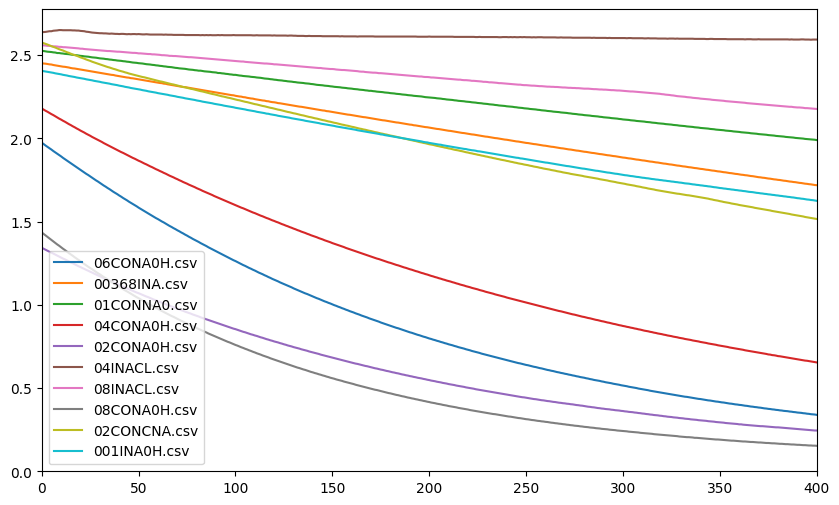

In [5]:
plt.figure(figsize=(10, 6), dpi=100)
csv_folder = '/Users/mihail/Desktop/kinetics/OUR_CSV'
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

for i in csv_files:
    df = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/"+str(i), skiprows=1)
    try:
        plt.plot(df['Time/sec'], df['Abs'], label=i)
    except:
        None
plt.legend()
#plt.yscale('log')
plt.savefig('beta2.jpg')
plt.xlim(0, 400)
plt.ylim(0)

second_beta = [""]

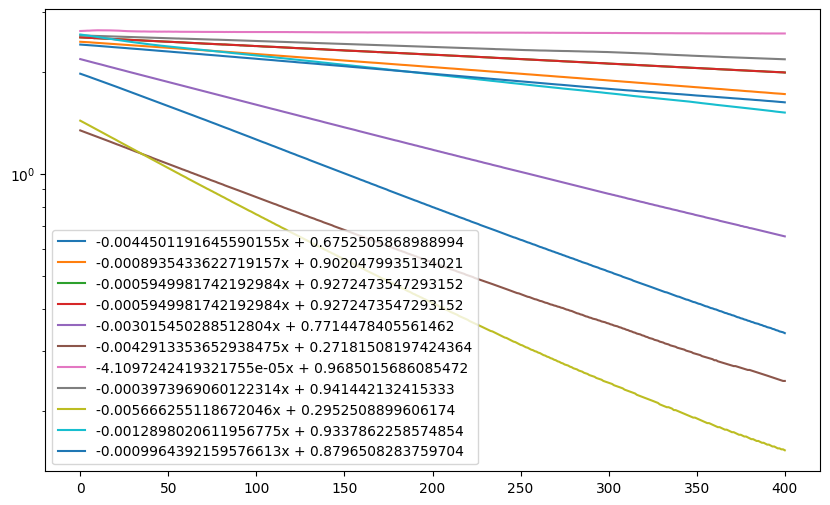

In [6]:
plt.figure(figsize=(10, 6), dpi=100)
csv_folder = '/Users/mihail/Desktop/kinetics/OUR_CSV'
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

for i in csv_files:
    df = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/"+str(i), skiprows=1)
    try:
        x = df['Time/sec']
        y = df['Abs']
    except:
        None
    a, b = np.polyfit(x, np.log(y), 1)
    plt.plot(x, y, label=f"{a}x + {b}")

plt.yscale('log')
plt.legend()

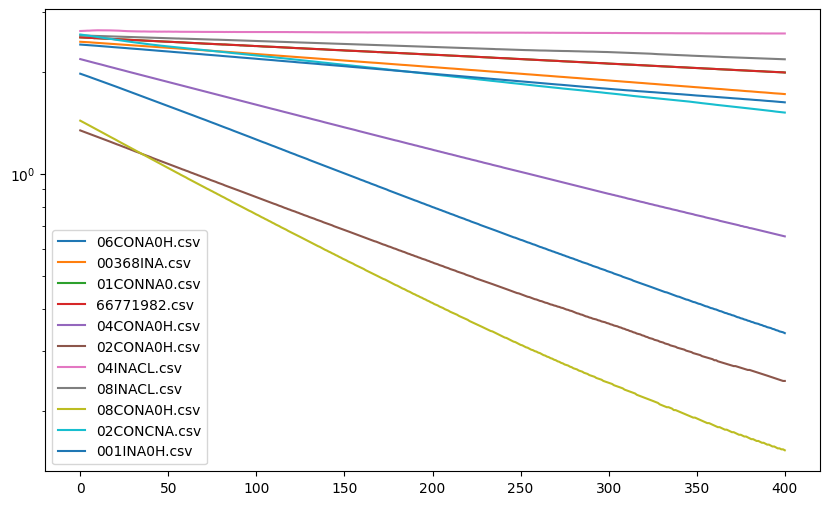

In [7]:
plt.figure(figsize=(10, 6), dpi=100)
csv_folder = '/Users/mihail/Desktop/kinetics/OUR_CSV'
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

for i in csv_files:
    df = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/"+str(i), skiprows=1)
    try:
        x = df['Time/sec']
        y = df['Abs']
    except:
        None
    a, b = np.polyfit(x, np.log(y), 1)
    plt.plot(x, y, label=i)

plt.yscale('log')
plt.legend()

# 1. Теперь по красоте данным графики

In [8]:
df1 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/01CONNA0.csv", skiprows=1)
df2 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/02CONCNA.csv", skiprows=1)
df3 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/02CONA0H.csv", skiprows=1)
df4 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/04CONA0H.csv", skiprows=1)
df5 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/06CONA0H.csv", skiprows=1)
df6 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/08CONA0H.csv", skiprows=1)

df_array = [df1, df2, df3, df4, df5, df6]

-0.0005949981742192984 0.9272473547293152 0.08601167825483524
-0.0012898020611956775 0.9337862258574854 0.14824917665795115
-0.003015450288512804 0.7714478405561462 0.10814977199899799
-0.0044501191645590155 0.6752505868988994 0.12538594184524005
-0.005666255118672046 0.2952508899606174 0.34311779547721905


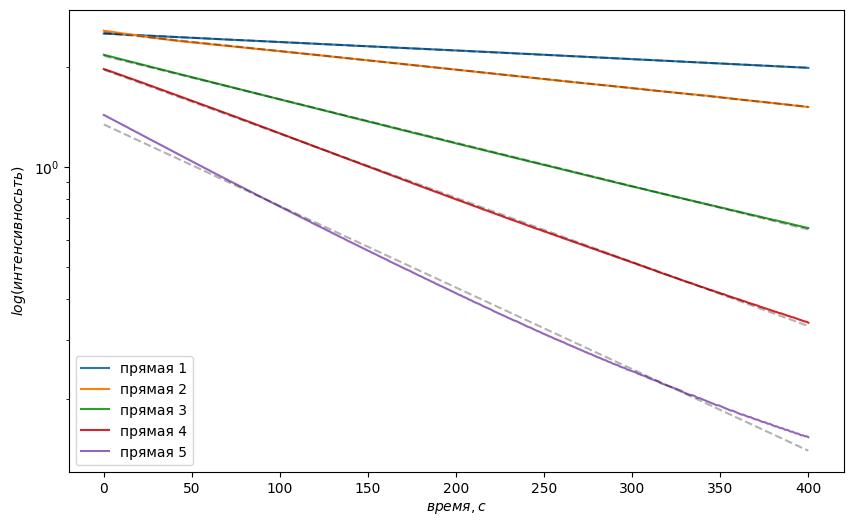

In [9]:
plt.figure(figsize=(10, 6), dpi=100)

for i in range(len(df_array)):
    if i == 2:
        #видимо сломанный график
        continue
    df = df_array[i]
    x = df['Time/sec']
    y = df['Abs']
    a, b = np.polyfit(x, np.log(y), 1)

    
    #аппроксимационная прямую
    coeffs = np.polyfit(x, np.log(y), 1)

    
    #определяем среднеквадратичную ошибку
    y_lin = a * x + b
    y_new = y - y_lin
    rmse = y_new.std()
    print(a, b, rmse)
    
    if i > 2:
        plt.plot(x, y, label=f"прямая {i}")
        plt.plot(x, np.exp(coeffs[1]) * np.exp(coeffs[0] * x), linestyle='--', color='black', alpha=0.3)
    else:
        plt.plot(x, y, label=f"прямая {i+1}")
        plt.plot(x, np.exp(coeffs[1]) * np.exp(coeffs[0] * x), linestyle='--', color='black', alpha=0.35)


plt.yscale('log')
plt.xlabel('$время, с$')
plt.ylabel('$log(интенсивносьть)$')
plt.legend()
plt.savefig('expo.jpg')

-0.0005949981742192984 0.9272473547293152 0.08601167825483524
-0.0012898020611956775 0.9337862258574854 0.14824917665795115
-0.003015450288512804 0.7714478405561462 0.10814977199899799
-0.0044501191645590155 0.6752505868988994 0.12538594184524005
-0.005666255118672046 0.2952508899606174 0.34311779547721905


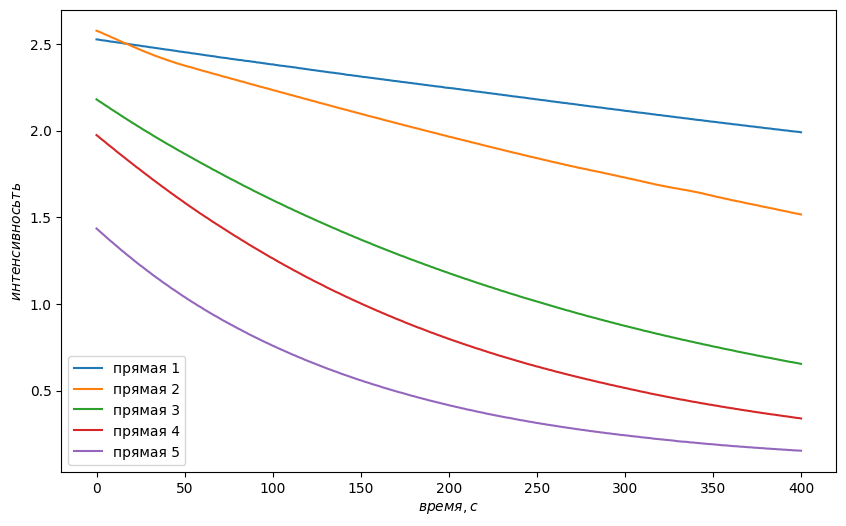

In [10]:
plt.figure(figsize=(10, 6), dpi=100)

for i in range(len(df_array)):
    if i == 2:
        #видимо сломанный график
        continue
    df = df_array[i]
    x = df['Time/sec']
    y = df['Abs']
    a, b = np.polyfit(x, np.log(y), 1)

    
    #аппроксимационная прямую
    coeffs = np.polyfit(x, np.log(y), 1)

    
    #определяем среднеквадратичную ошибку
    y_lin = a * x + b
    y_new = y - y_lin
    rmse = y_new.std()
    print(a, b, rmse)
    
    if i > 2:
        plt.plot(x, y, label=f"прямая {i}")
    else:
        plt.plot(x, y, label=f"прямая {i+1}")


plt.xlabel('$время, с$')
plt.ylabel('$интенсивносьть$')
plt.legend()
plt.savefig('first.jpg')

## Теперь график для определения порядка реакции

In [11]:
ks = np.array([-0.0005949981742192984,
              -0.0012898020611956775,
              -0.003015450288512804,
              -0.0044501191645590155,
              -0.005666255118672046])


oh = np.array([
    0.1, 0.2, 0.4, 0.6, 0.8
])


x = np.log(-ks)
y = np.log(oh)

порядок реакции вышел 0.9040830220246127
0.9040830220246127 4.397436910734191 0.04010536614994695


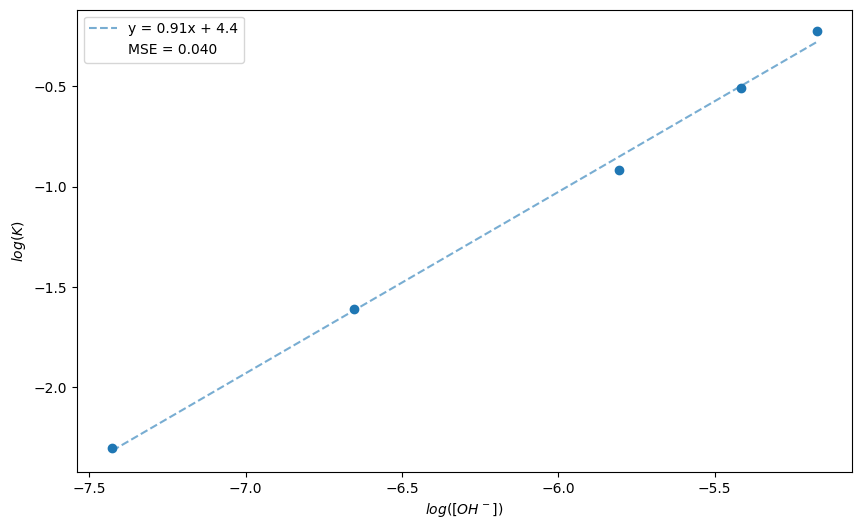

In [12]:
plt.figure(figsize=(10, 6), dpi=100)

a, b = np.polyfit(x, y, 1)
print(f'порядок реакции вышел {a}')


x_def = np.array([x.min(), x.max()])
y_pred = x_def * a + b


plt.scatter(x, y)
plt.plot(x_def, y_pred, linestyle='--', alpha=0.6, label=f"y = 0.91x + 4.4")
plt.plot([-6.5], [-2], color='white', label=f"MSE = 0.040")


y_lin = a * x + b
y_new = y - y_lin
rmse = y_new.std()
print(a, b, rmse)


plt.legend()
plt.xlabel("$log([OH^-])$")
plt.ylabel("$log(K)$")
plt.savefig("stepeni.jpg")

# 2. теперь графики при изменении ионной силы

In [13]:
df1 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/001INA0H.csv", skiprows=1)
df2 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/00368INA.csv", skiprows=1)
df3 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/01CONNA0.csv", skiprows=1) #то самое измерение из первого
df4 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/08INACL.csv", skiprows=1)
df5 = pd.read_csv("/Users/mihail/Desktop/kinetics/OUR_CSV/04INACL.csv", skiprows=1) #выброс удалить


df_array = [df1, df2, df3, df4, df5]

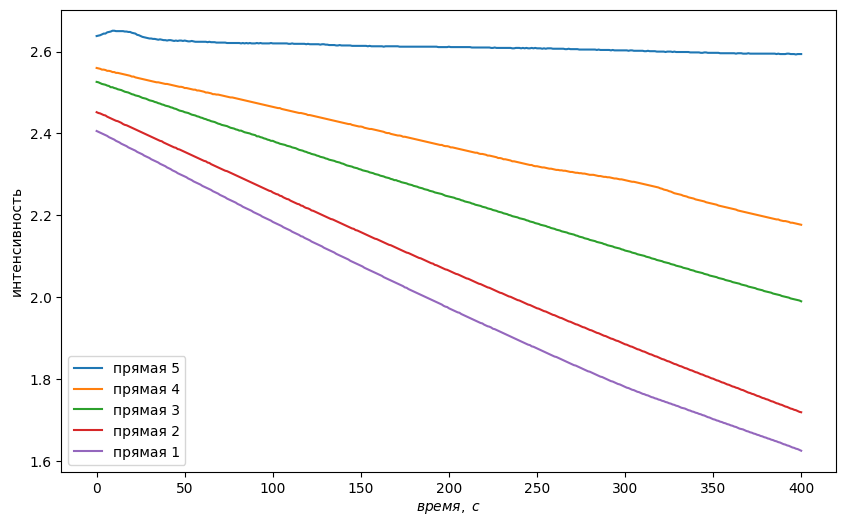

In [14]:
plt.figure(figsize=(10, 6), dpi=100)

for i in range(len(df_array)):
    df = df_array[4-i]
    x = df['Time/sec']
    y = df['Abs']
    plt.plot(x, y, label=f'прямая {4-i+1}')

plt.legend()
plt.xlabel(r'$время,\ с$')
plt.ylabel('интенсивность')
plt.savefig('pic2_1.jpg')

-0.0003973969060122314 0.941442132415333 0.06307392665255493
-0.0005949981742192984 0.9272473547293152 0.08601167825483524
-0.0008935433622719157 0.9020479935134021 0.110490271905963
-0.0009964392159576613 0.8796508283759704 0.11447257004710608
-4.1097242419321755e-05 0.9685015686085472 0.00877932781173484


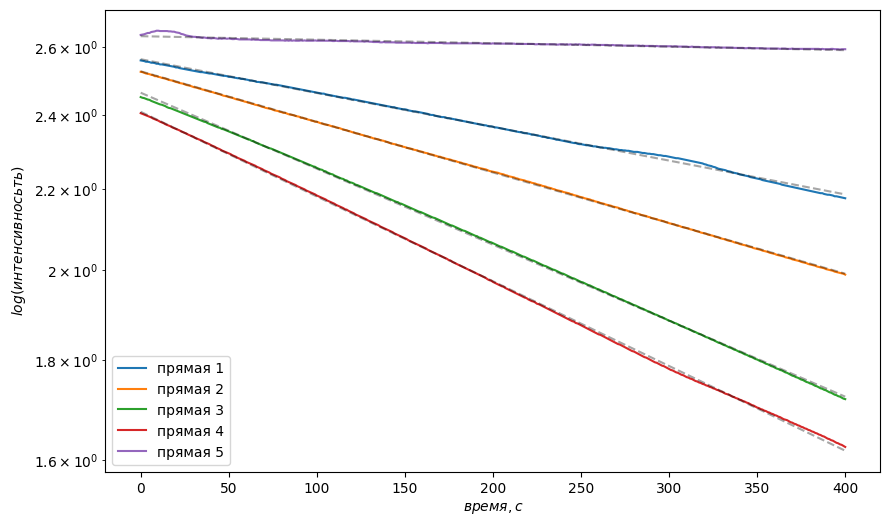

In [15]:
plt.figure(figsize=(10, 6), dpi=100)

ks = []
for i in range(len(df_array)):
    df = df_array[3-i]
    x = df['Time/sec']
    y = df['Abs']
    a, b = np.polyfit(x, np.log(y), 1)
    ks.append(a)

    #аппроксимационная прямую
    coeffs = np.polyfit(x, np.log(y), 1)

    #определяем среднеквадратичную ошибку
    y_lin = a * x + b
    y_new = y - y_lin
    rmse = y_new.std()
    print(a, b, rmse)
    
    plt.plot(x, y, label=f"прямая {i+1}")
    plt.plot(x, np.exp(coeffs[1]) * np.exp(coeffs[0] * x), linestyle='--', color='black', alpha=0.35)


plt.yscale('log')
plt.xlabel('$время, с$')
plt.ylabel('$log(интенсивносьть)$')
plt.legend()
plt.savefig('pic2_2.jpg')

## строим график зависимость логарифма k от корня ионной силы

In [16]:
ksn = np.array(ks[0:4])

x_ok = np.array([0.01, 0.038, 0.3, 0.8])
x_ok = np.sqrt(x_ok)
y_ok = np.log10(-ksn)

x_err = np.sqrt(np.array([0.04]))
y_err = np.array([ np.log10(-ks[4]) ])

коэфицент наклона - 0.4615344435080674, интерсепт - -3.369604573282397


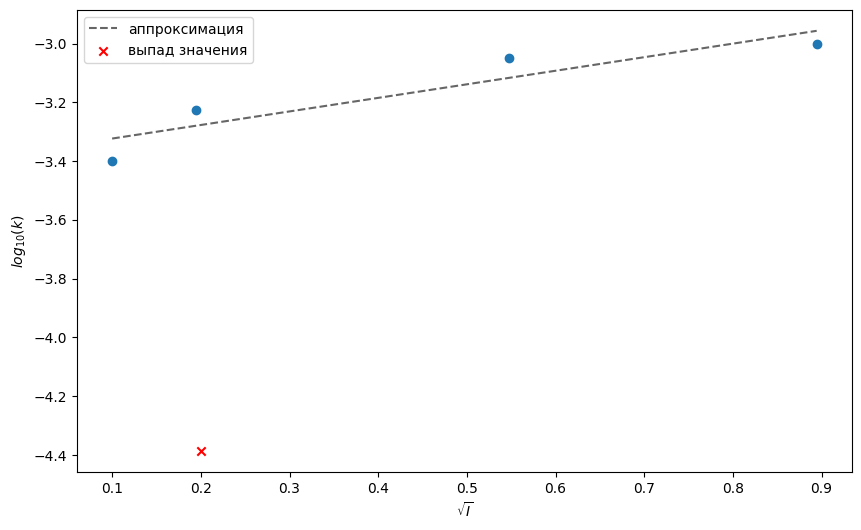

In [17]:
plt.figure(figsize=(10, 6), dpi=100)

a, b = np.polyfit(x_ok, y_ok, 1)

ap1 = np.array([x_ok.min(), x_ok.max()])
ap2 = ap1 * a + b
plt.plot(ap1, ap2, linestyle='--', color='black', alpha=0.6, label='аппроксимация')
plt.scatter(x_ok, y_ok)
plt.scatter(x_err, y_err, color='red', marker='x', label='выпад значения')

plt.legend()
plt.xlabel(r"$\sqrt{I}$")
plt.ylabel(r"$log_{10}(k)$")

print(f"коэфицент наклона - {a}, интерсепт - {b}")
plt.savefig("pic2_3.jpg")